In [1]:
def collect_scores():
    LOGDIR = f"../rl-module/pytorch_train_dir"

    training_sessions = ['1', '2', '3', '4', 'keep']

    training_session_dict = {}

    def read_actor_score(path):
        score_list = []
        with open(path, 'r') as f:
            for line in f:
                if 'Score' in line:
                    score = float(line[:-1].split(': ')[-1])
                    score_list.append(score)
        return  score_list

    for session in training_sessions:
        log_file_path = f"{LOGDIR}_{session}/actor0_training_log.txt"
        score_list = read_actor_score(log_file_path)
        training_session_dict[session] = score_list
    
    return training_session_dict

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_score(training_session_dict, steps=90):
    plt.figure(figsize=(10, 5))
    for session in training_session_dict:
        sns.lineplot(x=range(min(steps, len(training_session_dict[session]))), y=training_session_dict[session][:steps], label=session)
        # sns.plot(training_session_dict[session][:steps], label=session)
    
    plt.y_axis = range(-10, 70, 20)
    plt.ylim(-110, 70)
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

def plot_avg(training_session_dict, steps=90):
    avg_score = []
    min_score = []
    max_score = []
    score_num = len(training_session_dict)
    for i in range(steps):
        sum_i = 0
        min_i, max_i = float("inf"), float("-inf")
        for session in training_session_dict:
            if i < len(training_session_dict[session]):
                sum_i += training_session_dict[session][i]
                min_i = min(min_i, training_session_dict[session][i])
                max_i = max(max_i, training_session_dict[session][i])
        avg_i = sum_i / score_num
        avg_score.append(avg_i)
        min_score.append(min_i)
        max_score.append(max_i)

    plt.figure(figsize=(10, 5))
    for session in training_session_dict:
        plt.plot(avg_score, label=session)
        plt.fill_between(x=range(len(avg_score)), y1=min_score, y2=max_score, alpha=0.2)
        # sns.plot(training_session_dict[session][:steps], label=session)
    
    plt.y_axis = range(-10, 70, 20)
    plt.ylim(-110, 70)
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

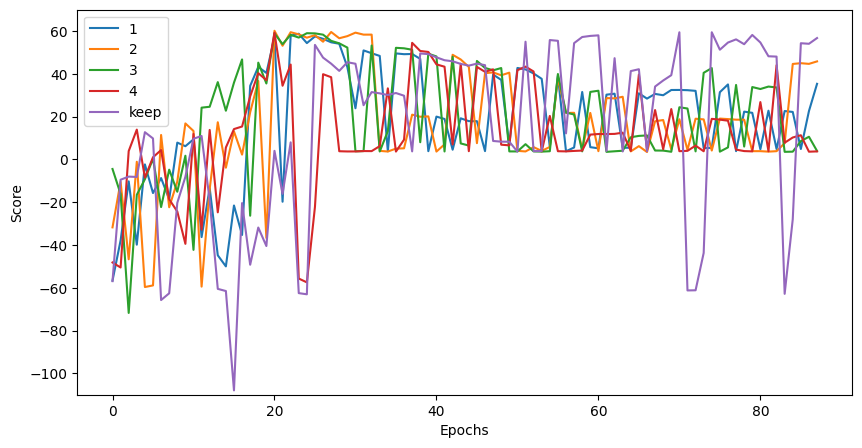

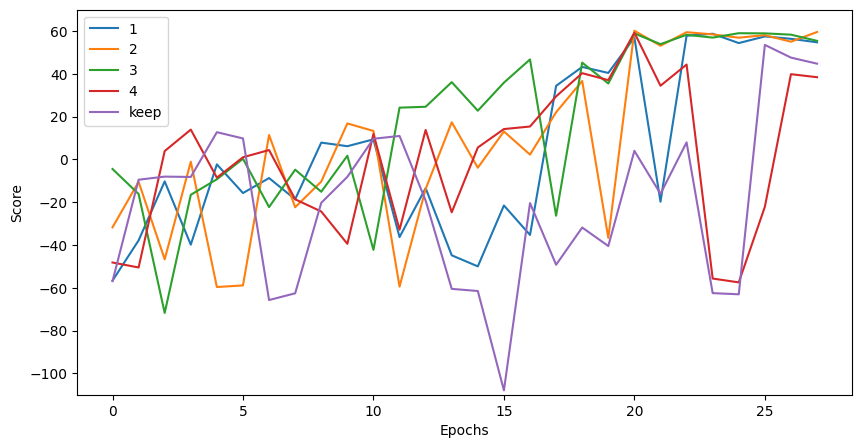

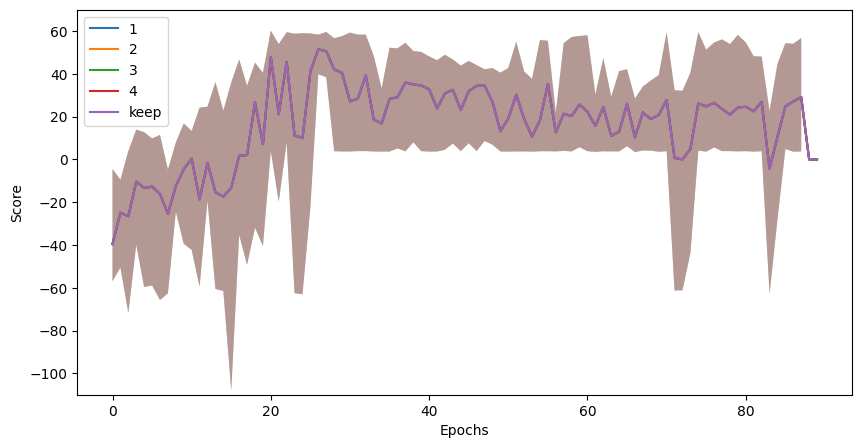

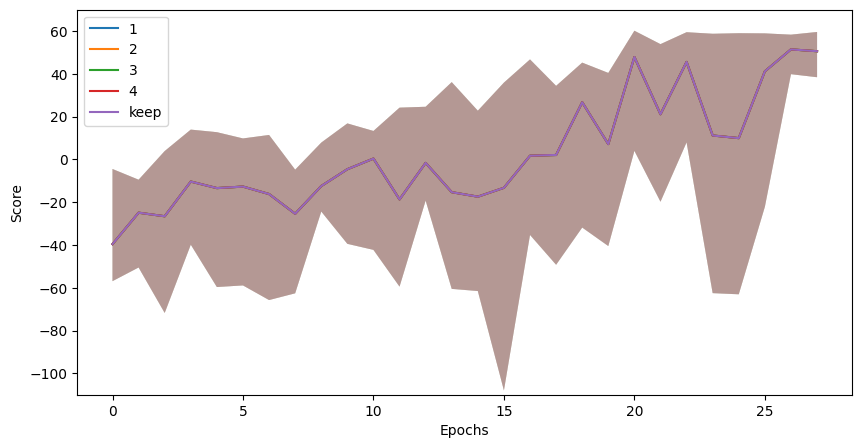

In [32]:
training_session_dict = collect_scores()

plot_score(training_session_dict)
plot_score(training_session_dict, 28)

plot_avg(training_session_dict)
plot_avg(training_session_dict, 28)
